In [25]:
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import pywt
import evaluation

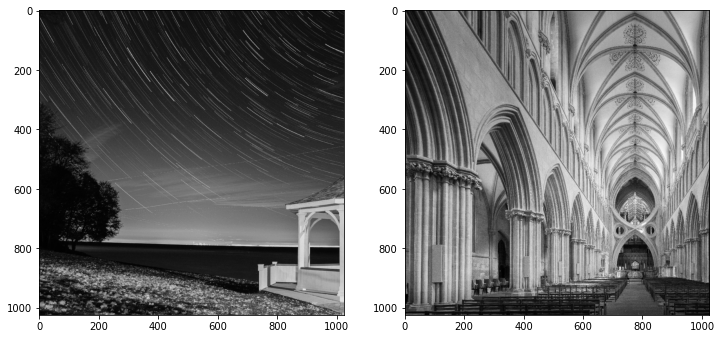

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
im = Image.open('images/cover/099902.jpg').convert('L')
cover = np.array(im)  # 2D array
secret = np.array(Image.open('images/secret/test.jpg').convert('L'))

cover = cover / 255
secret = secret / 255

axes[0].imshow(cover*255, cmap='gray', vmin=0, vmax=255)
axes[1].imshow(secret*255, cmap='gray', vmin=0, vmax=255)

plt.show()

(1024, 1024)


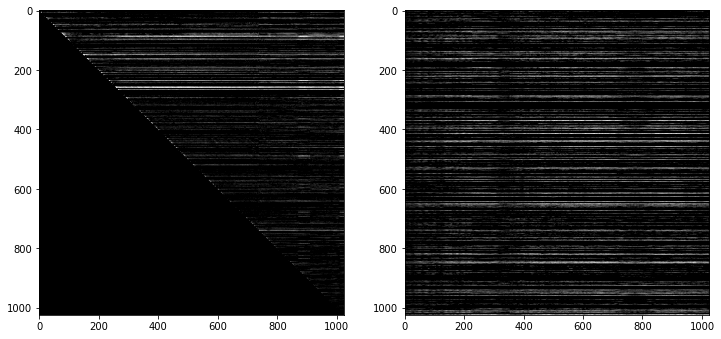

In [32]:
alpha = 0.01
wavelet = 'db1'

from scipy.stats import ortho_group  # Requires version 0.18 of scipy
m = ortho_group.rvs(dim=1024)
print(m.shape)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
qc, rc = np.linalg.qr(cover)
qs, rs = np.linalg.qr(secret)

ts = m @ secret

axes[0].imshow(rc*255, cmap='gray', vmin=0, vmax=255)
axes[1].imshow(ts*255, cmap='gray', vmin=0, vmax=255)

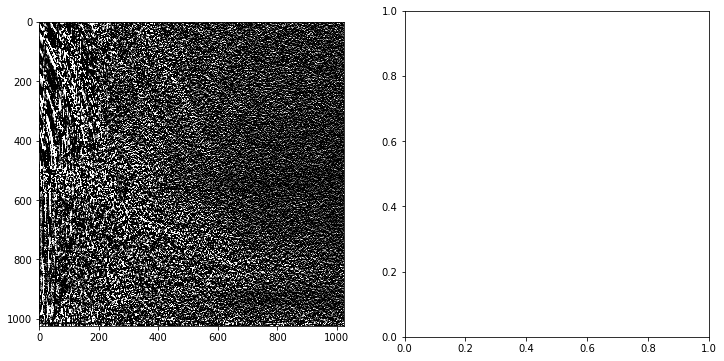

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
axes[0].imshow(qs*25500, cmap='gray', vmin=0, vmax=255)

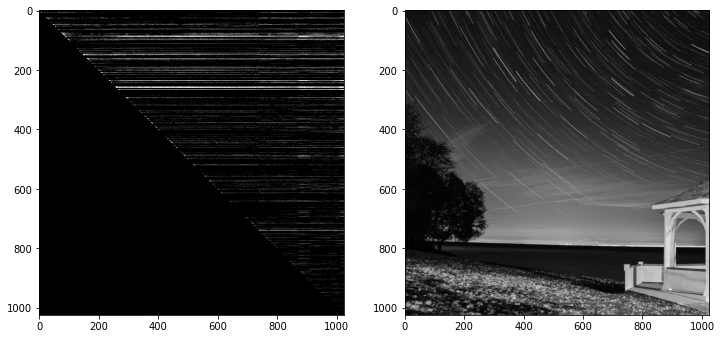

In [34]:
r_combined = rc + (alpha * ts)
stego = qc @ r_combined
    
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
axes[0].imshow(r_combined*255, cmap='gray', vmin=0, vmax=255)
axes[1].imshow(stego*255, cmap='gray', vmin=0, vmax=255)

0.9993512419604451

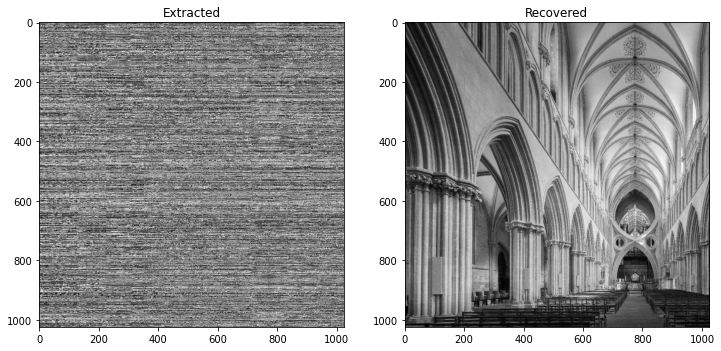

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
r1 = qc.T @ stego
ts_extracted = (r1 - rc) / alpha
recovered = m.T @ ts_extracted
axes[0].imshow(np.uint8(ts_extracted*255), cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Extracted')
axes[1].imshow(np.uint8(recovered*255), cmap='gray', vmin=0, vmax=255)
axes[1].set_title('Recovered')
import skimage
skimage.metrics.structural_similarity(np.uint8(secret*255), np.uint8(recovered*255))

/Users/michael/CPC2/lib/python3.7/site-packages/ipykernel_launcher.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  """
/Users/michael/CPC2/lib/python3.7/site-packages/ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys
/Users/michael/CPC2/lib/python3.7/site-packages/skimage/_shared/utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)
/Users/michael/CPC2/lib/python3.7/site-packages/skimage/metrics/_structural_similarity.py:199: ComplexWarning: Casting complex values to real discards the imaginary part
  im2 = im2.astype(float_type, copy=False)


6.792764494796835e-12

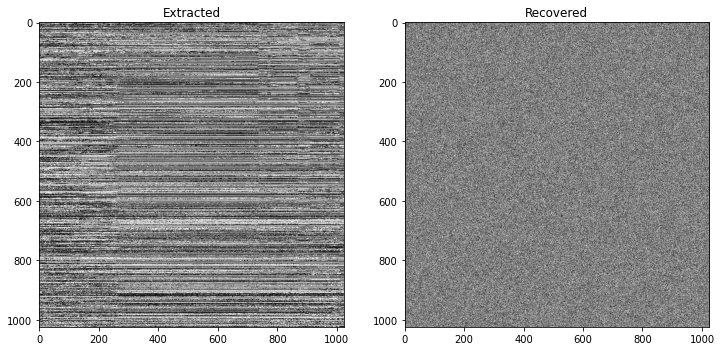

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
r1 = qc.T @ stego
ts_extracted = (r1 - rc) / alpha
recovered = m.T @ ts_extracted
axes[0].imshow(np.uint8(r1*255), cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Extracted')
axes[1].imshow(np.uint8(recovered*255), cmap='gray', vmin=0, vmax=255)
axes[1].set_title('Recovered')

Text(0.5, 1.0, 'Recovered')

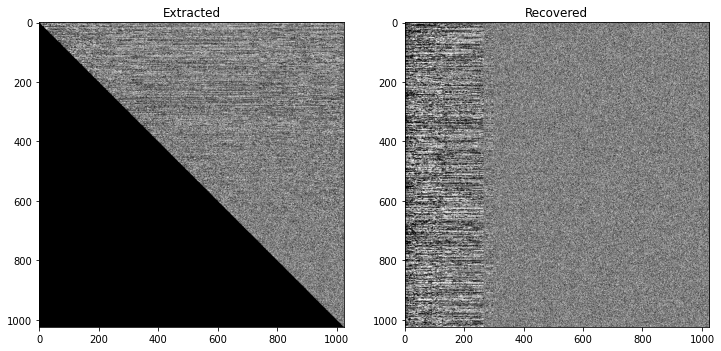

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
qsi, rsi = np.linalg.qr(stego)
r_extracted = (rsi - rc) / alpha
recovered = m @ r_extracted
axes[0].imshow(np.uint8(r_extracted*255), cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Extracted')
axes[1].imshow(np.uint8(recovered*255), cmap='gray', vmin=0, vmax=255)
axes[1].set_title('Recovered')

In [9]:
r_extracted - ts

array([[ -0.07815131,  -0.0169975 ,   0.10148759, ...,  -0.95157906,
         -0.95803649,  -0.85733682],
       [ -0.17656192,  -0.1796585 ,  -0.07972288, ...,  -1.31328591,
         -1.32868483,  -1.37562568],
       [ -0.38408925,  -0.45762891,  -0.42184149, ...,  -1.88181233,
         -1.89946008,  -1.966626  ],
       ...,
       [ -0.29293608,  -0.24931263,  -0.23311831, ...,  -7.74910147,
        -10.1284483 , -13.15784824],
       [  0.36544984,   0.42584503,   0.448504  , ...,   0.60242681,
          1.12511445,   1.02115069],
       [  0.27127639,   0.35651412,   0.38623426, ...,   0.04791264,
          0.18614017,  -0.74043476]])

In [10]:
from scipy.stats import ortho_group  # Requires version 0.18 of scipy
key = ortho_group.rvs(dim=1024)
print(key.shape)

(1024, 1024)


In [11]:
qc, rc = np.linalg.qr(np.fft.fft2(cover))
alpha = 0.001

In [12]:
ts = key @ np.fft.fft2(secret)
r_combined = rc + (alpha * ts)
stego_pre = qc @ r_combined

stego = np.fft.ifft2(stego_pre)
stego_untransformed = np.fft.fft2(stego)

r1 = qc.T @ stego_untransformed
print(qc.T @ qc)
#print(key.T@key)
#ts_extracted = (r1 - rc) / alpha
# print(ts_extracted - ts)

recovered = key.T @ ts_extracted
recovered = np.fft.ifft2(recovered)

[[ 7.13671693e-01+2.77555756e-17j -1.07489043e-02-2.14615470e-01j
  -5.26581214e-02-3.37649975e-01j ...  3.01391281e-04-3.25646053e-03j
  -1.11714771e-03+2.75340833e-03j -4.00214101e-03-1.55039127e-03j]
 [-1.07489043e-02-2.14615470e-01j  1.50746639e-01+1.49914349e-01j
   1.75854047e-01+7.40042845e-02j ...  1.29395810e-02+1.71374980e-02j
  -2.27991139e-03+9.89082303e-03j  3.73387210e-03+6.43351276e-03j]
 [-5.26581214e-02-3.37649975e-01j  1.75854047e-01+7.40042845e-02j
   2.29341118e-01-3.81528162e-02j ... -2.35106310e-02+9.27220797e-03j
   1.97300673e-03-3.46341749e-03j  1.57174103e-02-1.09371659e-02j]
 ...
 [ 3.01391281e-04-3.25646053e-03j  1.29395810e-02+1.71374980e-02j
  -2.35106310e-02+9.27220797e-03j ...  3.39214057e-02+7.57534234e-03j
  -1.96590958e-02+1.66354501e-02j -3.73826035e-03+1.46113445e-02j]
 [-1.11714771e-03+2.75340833e-03j -2.27991139e-03+9.89082303e-03j
   1.97300673e-03-3.46341749e-03j ... -1.96590958e-02+1.66354501e-02j
  -5.69416078e-03-1.16411869e-02j  1.32032724e-

In [13]:
i = np.fft.fft2(secret)
i - (m.T @ (m @ i))

array([[ 5.82076609e-11+1.30739863e-12j, -7.27595761e-12+7.27595761e-12j,
         0.00000000e+00+9.09494702e-13j, ...,
        -3.63797881e-12-7.27595761e-12j, -1.36424205e-12+2.72848411e-12j,
        -7.27595761e-12-2.18278728e-11j],
       [ 2.91038305e-11+6.36646291e-12j, -7.27595761e-12+1.09139364e-11j,
        -1.09139364e-11-5.45696821e-12j, ...,
         7.27595761e-12-5.45696821e-12j,  1.81898940e-11-5.45696821e-12j,
         7.27595761e-12-7.27595761e-12j],
       [-1.45519152e-11+0.00000000e+00j, -1.81898940e-12-1.81898940e-12j,
        -1.81898940e-12-1.81898940e-12j, ...,
         4.54747351e-12-9.09494702e-13j,  3.63797881e-12-2.27373675e-12j,
         4.54747351e-12+9.09494702e-13j],
       ...,
       [-1.45519152e-11+1.09139364e-11j, -5.45696821e-12-2.72848411e-12j,
        -3.63797881e-12-2.27373675e-12j, ...,
         3.51718654e-12+1.47792889e-12j,  3.18323146e-12-2.50111043e-12j,
         3.63797881e-12+3.63797881e-12j],
       [-7.27595761e-12+2.72848411e-12j,  1.

In [14]:
secret - np.fft.ifft2(i)

array([[ 1.11022302e-16+2.66713734e-17j,  1.24900090e-16-8.58552595e-18j,
         2.77555756e-17-5.13640779e-18j, ...,
        -1.11022302e-16-3.92091551e-17j,  5.55111512e-17-1.44876515e-17j,
         0.00000000e+00+3.22550146e-18j],
       [-5.55111512e-17+4.51028104e-17j,  0.00000000e+00+2.06201701e-17j,
        -5.55111512e-17-1.34034494e-17j, ...,
        -2.22044605e-16+5.62311292e-17j,  5.55111512e-17+1.25360876e-17j,
         1.11022302e-16-2.72947897e-17j],
       [ 5.55111512e-17+5.59448321e-17j,  1.11022302e-16+1.54837623e-17j,
        -1.52655666e-16+2.90159606e-17j, ...,
         0.00000000e+00+5.89365525e-18j, -1.11022302e-16+2.10064171e-18j,
         2.22044605e-16-6.47539748e-17j],
       ...,
       [ 0.00000000e+00+2.05998413e-17j,  2.77555756e-17-2.24226562e-17j,
         0.00000000e+00-3.05338437e-17j, ...,
         2.77555756e-17-2.67374420e-17j, -8.32667268e-17-9.51251881e-17j,
         1.24900090e-16-6.63260679e-17j],
       [ 0.00000000e+00+1.82688066e-17j, -5.